In [44]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [45]:
heart_data = pd.read_csv('heart.csv')
heart_data[:10]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [46]:
x = heart_data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']].values
x[:5]

array([[40, 'M', 'ATA', 140, 289, 0, 'Normal', 172, 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', 160, 180, 0, 'Normal', 156, 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', 130, 283, 0, 'ST', 98, 'N', 0.0, 'Up'],
       [48, 'F', 'ASY', 138, 214, 0, 'Normal', 108, 'Y', 1.5, 'Flat'],
       [54, 'M', 'NAP', 150, 195, 0, 'Normal', 122, 'N', 0.0, 'Up']],
      dtype=object)

In [47]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
x[:, 1] = le_sex.transform(x[:, 1])

le_chestpaintype = preprocessing.LabelEncoder()
le_chestpaintype.fit(['TA', 'ATA', 'NAP', 'ASY'])
x[:, 2] = le_chestpaintype.transform(x[:, 2])

le_restingecg = preprocessing.LabelEncoder()
le_restingecg.fit(['Normal', 'ST', 'LVH'])
x[:, 6] = le_restingecg.transform(x[:, 6])

le_exerciseangina = preprocessing.LabelEncoder()
le_exerciseangina.fit(['Y', 'N'])
x[:, 8] = le_exerciseangina.transform(x[:, 8])

le_stslope = preprocessing.LabelEncoder()
le_stslope.fit(['Up', 'Flat', 'Down'])
x[:, 10] = le_stslope.transform(x[:, 10])

x[:5]

array([[40, 1, 1, 140, 289, 0, 1, 172, 0, 0.0, 2],
       [49, 0, 2, 160, 180, 0, 1, 156, 0, 1.0, 1],
       [37, 1, 1, 130, 283, 0, 2, 98, 0, 0.0, 2],
       [48, 0, 0, 138, 214, 0, 1, 108, 1, 1.5, 1],
       [54, 1, 2, 150, 195, 0, 1, 122, 0, 0.0, 2]], dtype=object)

In [48]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[:5]

array([[-1.4331398 ,  0.51595242,  0.22903206,  0.41090889,  0.82507026,
        -0.55134134,  0.01725451,  1.38292822, -0.8235563 , -0.83243239,
         1.05211381],
       [-0.47848359, -1.93816322,  1.27505906,  1.49175234, -0.17196105,
        -0.55134134,  0.01725451,  0.75415714, -0.8235563 ,  0.10566353,
        -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, -0.12951283,  0.7701878 ,
        -0.55134134,  1.60121899, -1.52513802, -0.8235563 , -0.83243239,
         1.05211381],
       [-0.5845565 , -1.93816322, -0.81699495,  0.30282455,  0.13903954,
        -0.55134134,  0.01725451, -1.13215609,  1.21424608,  0.57471149,
        -0.59607813],
       [ 0.05188098,  0.51595242,  1.27505906,  0.95133062, -0.0347549 ,
        -0.55134134,  0.01725451, -0.5819814 , -0.8235563 , -0.83243239,
         1.05211381]])

In [49]:
y = heart_data['HeartDisease'].values
y[:5]

array([0, 1, 0, 1, 0], dtype=int64)

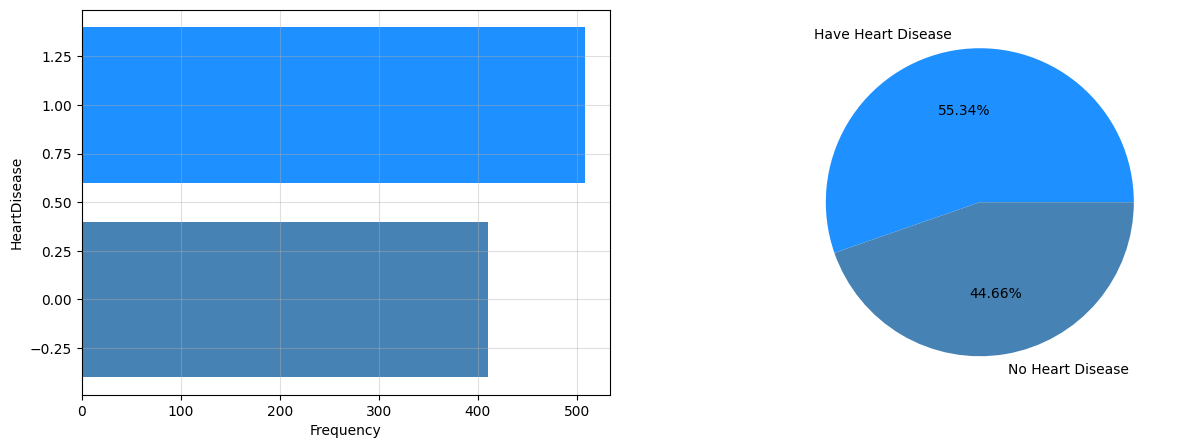

In [60]:
types = heart_data['HeartDisease'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.barh(y=types.index, width=types.values, color=['dodgerblue', 'steelblue'])
ax1.set_xlabel('Frequency')
ax1.set_ylabel('HeartDisease')
ax1.grid(alpha=0.4)

ax2.pie(types.values, labels = ['Have Heart Disease', 'No Heart Disease'], colors = ['dodgerblue', 'steelblue'], autopct = '%.2f%%')

plt.show(fig)

In [51]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 3)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(734, 11) (734,) (184, 11) (184,)


In [52]:
k = 2
knn = KNeighborsClassifier(n_neighbors = k)
knn

KNeighborsClassifier(n_neighbors=2)

In [53]:
neigh = knn.fit(train_x, train_y)
neigh

KNeighborsClassifier(n_neighbors=2)

In [54]:
test_y_ = neigh.predict(test_x)
print(test_y_[:5], test_y[:5])

[1 1 1 1 0] [1 1 1 1 0]


In [55]:
print("Accuracy of Test set = ", metrics.accuracy_score(test_y, test_y_))
print("Accuracy of Train set = ", metrics.accuracy_score(train_y, neigh.predict(train_x)))

Accuracy of Test set =  0.8260869565217391
Accuracy of Train set =  0.9100817438692098


In [56]:
print('Accuracy of the full Dataset = ', metrics.accuracy_score(y, neigh.predict(x)))

Accuracy of the full Dataset =  0.8932461873638344


In [57]:
ks = 20
mean_acc = np.zeros(ks-1)

for i in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(train_x, train_y)
    test_y_ = neigh.predict(test_x)
    mean_acc[i-1] = metrics.accuracy_score(test_y, test_y_)

mean_acc

array([0.81521739, 0.82608696, 0.8423913 , 0.85326087, 0.89130435,
       0.875     , 0.89130435, 0.86956522, 0.875     , 0.875     ,
       0.88043478, 0.88586957, 0.88043478, 0.875     , 0.86956522,
       0.88043478, 0.875     , 0.88043478, 0.88043478])

In [58]:
mean_acc.max()

0.8913043478260869

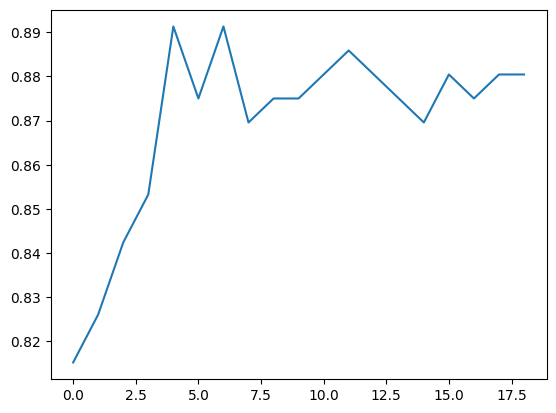

In [59]:
plt.plot(mean_acc)